# Understanding the Data

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sns

df = pd.read_csv('data/marketing_campaign.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [234]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [235]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [236]:
df = df.dropna(subset=['Income'])

In [237]:
df['Income'].describe()
df = df[df['Income'] < 600000]

In [238]:
unique_education = df['Education'].unique()
print(unique_education)
print(df['Education'].value_counts())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


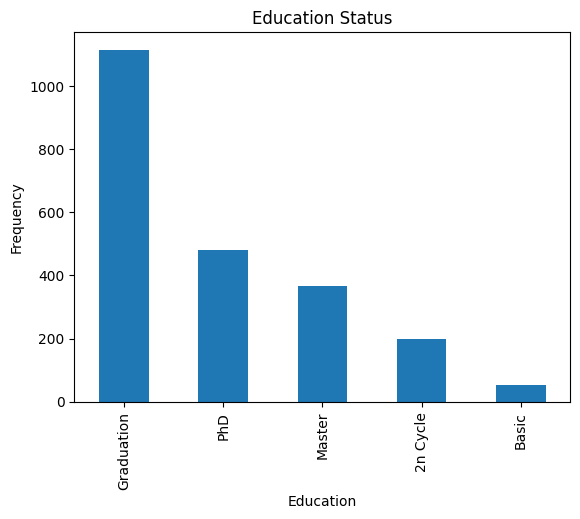

In [239]:
df['Education'].value_counts().plot(kind='bar', title='Education Status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [240]:
unique_marital_status = df['Marital_Status'].unique()
print(unique_marital_status)
print(df['Marital_Status'].value_counts())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


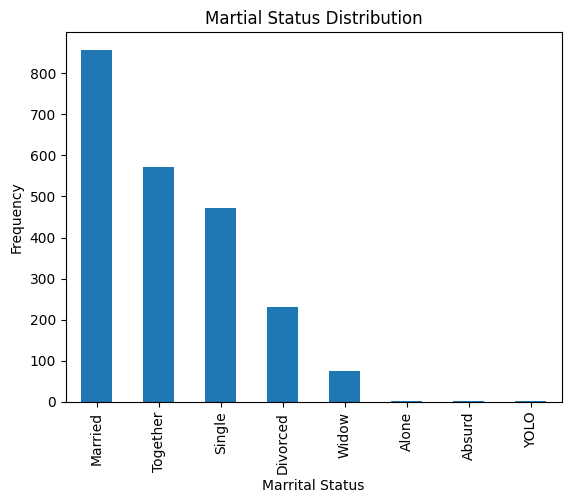

In [241]:
df['Marital_Status'].value_counts().plot(kind='bar', title='Martial Status Distribution')
plt.xlabel('Marrital Status')
plt.ylabel('Frequency')
plt.show()

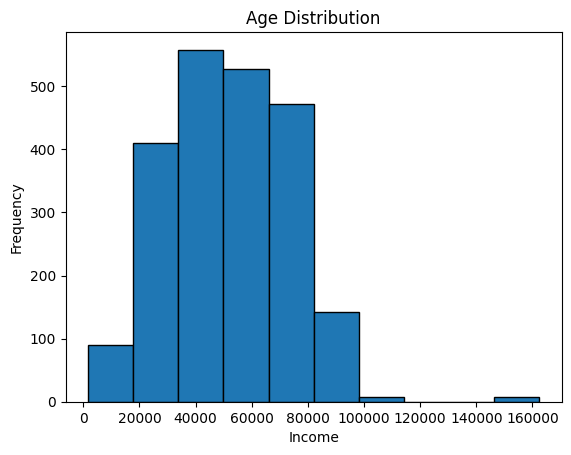

In [242]:
df['Income'].plot(kind='hist', bins=10, edgecolor='black', title='Age Distribution')
plt.xlabel('Income')
plt.show()

# Feature Engineering / Normalization

Get Customer_For feature = Calculates customer loyalty from 2021 to first sign up.


In [243]:
# Convert "Dt_Customer" to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Get the dates of the newest and oldest recorded customer
# Manually set max_date to January 1, 2021
max_date = pd.to_datetime("2021-01-01")
min_date = df["Dt_Customer"].min()

print("The newest customer's enrollment date in the records:", max_date)
print("The oldest customer's enrollment date in the records:", min_date)

# Create the feature "Customer_For" (number of days since enrollment)
df["Customer_For"] = (max_date - df["Dt_Customer"]).dt.days

df['Customer_For']

The newest customer's enrollment date in the records: 2021-01-01 00:00:00
The oldest customer's enrollment date in the records: 2012-07-30 00:00:00


0       3041
1       2491
2       2690
3       2517
4       2539
        ... 
2235    2759
2236    2397
2237    2533
2238    2534
2239    3000
Name: Customer_For, Length: 2215, dtype: int64

In [244]:
df['Age'] = 2021 - df['Year_Birth']
df['Education'] = df['Education'].replace(
    {
        'Graduation': 'Undergrad',
        'PhD': 'Postgrad',
        'Master': 'Postgrad',
        '2n Cycle': 'Undergrad',
        'Basic': 'No College'
    }
)
df['Marital_Status'] = df['Marital_Status'].replace(
    {
        'Married': 'Together',
        'Together': 'Together',
        'Single': 'Single',
        'Divorced': 'Single',
        'Widow': 'Single',
        'Alone': 'Single',
        'Absurd': 'Single',
        'YOLO': 'Single'
    }
)
df['Children_Count'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Marital_Status'].replace(
    {
        'Single': 1,
        'Together': 2
    }
) + df['Children_Count']
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df = df.rename(
    columns={
        'MntWines': 'Wines',
        'MntFruits': 'Fruits',
        'MntMeatProducts': 'Meats',
        'MntFishProducts': 'Fish',
        'MntSweetProducts': 'Sweets',
        'MntGoldProds': 'Gold'
    }
)
df

C:\Users\tpngu\AppData\Local\Temp\ipykernel_53872\1370986029.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_Size'] = df['Marital_Status'].replace(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,5524,1957,Undergrad,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3041,64,0,1,1617
1,2174,1954,Undergrad,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2491,67,2,3,27
2,4141,1965,Undergrad,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2690,56,0,2,776
3,6182,1984,Undergrad,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2517,37,1,3,53
4,5324,1981,Postgrad,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Together,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2759,54,1,3,1341
2236,4001,1946,Postgrad,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2397,75,3,5,444
2237,7270,1981,Undergrad,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2533,40,0,1,1241
2238,8235,1956,Postgrad,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2534,65,1,3,843


In [245]:
df = df[['Age', 'Customer_For', 'Income', 'Education', 'Marital_Status', 'Family_Size', 'Children_Count', 'Total_Spent', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold']]
df

,Age,Customer_For,Income,Education,Marital_Status,Family_Size,Children_Count,Total_Spent,Wines,Fruits,Meats,Fish,Sweets,Gold
0,64,3041,58138.0,Undergrad,Single,1,0,1617,635,88,546,172,88,88
1,67,2491,46344.0,Undergrad,Single,3,2,27,11,1,6,2,1,6
2,56,2690,71613.0,Undergrad,Together,2,0,776,426,49,127,111,21,42
3,37,2517,26646.0,Undergrad,Together,3,1,53,11,4,20,10,3,5
4,40,2539,58293.0,Postgrad,Together,3,1,422,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,2759,61223.0,Undergrad,Together,3,1,1341,709,43,182,42,118,247
2236,75,2397,64014.0,Postgrad,Together,5,3,444,406,0,30,0,0,8
2237,40,2533,56981.0,Undergrad,Single,1,0,1241,908,48,217,32,12,24
2238,65,2534,69245.0,Postgrad,Together,3,1,843,428,30,214,80,30,61


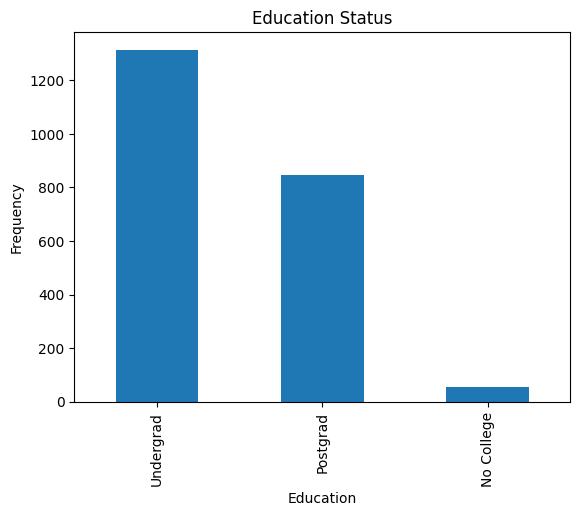

In [246]:
df['Education'].value_counts().plot(kind='bar', title='Education Status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

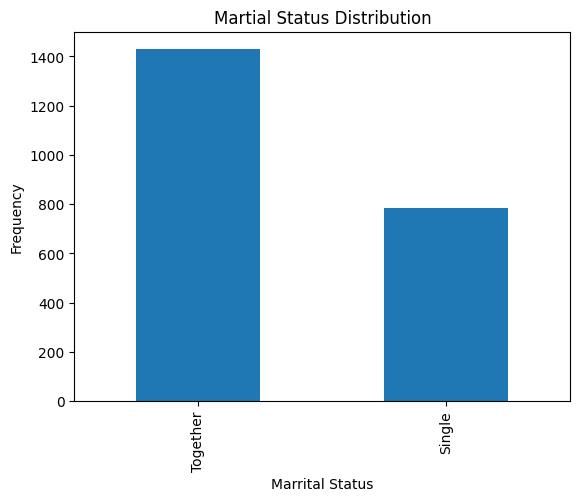

In [247]:
df['Marital_Status'].value_counts().plot(kind='bar', title='Martial Status Distribution')
plt.xlabel('Marrital Status')
plt.ylabel('Frequency')
plt.show()

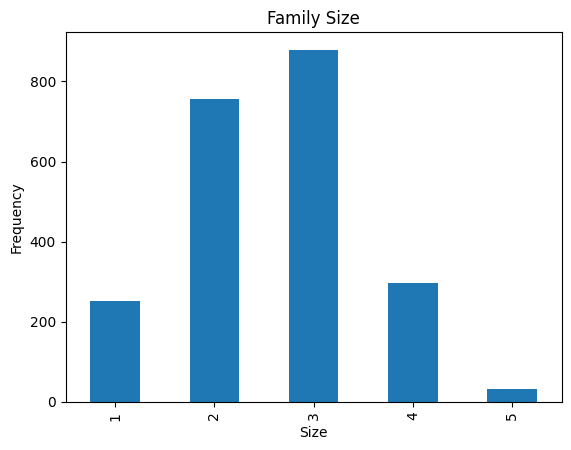

In [248]:
df['Family_Size'].value_counts().sort_index().plot(kind='bar', title='Family Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

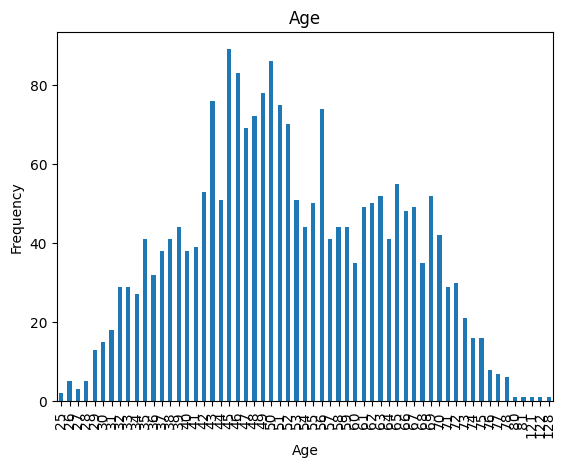

In [249]:
df['Age'].value_counts().sort_index().plot(kind='bar', title='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Realizing I should one hot encode features like marital status and education 
<br>
Reason being is because this data isn't ordinal meaning ordering matters... For this reason, since ordering of education or marital status doesn't matter, it's probably best that I create additional features to build out the one hot encoding

In [250]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
df

,Age,Customer_For,Income,Family_Size,Children_Count,Total_Spent,Wines,Fruits,Meats,Fish,Sweets,Gold,Education_No College,Education_Postgrad,Education_Undergrad,Marital_Status_Single,Marital_Status_Together
0,64,3041,58138.0,1,0,1617,635,88,546,172,88,88,False,False,True,True,False
1,67,2491,46344.0,3,2,27,11,1,6,2,1,6,False,False,True,True,False
2,56,2690,71613.0,2,0,776,426,49,127,111,21,42,False,False,True,False,True
3,37,2517,26646.0,3,1,53,11,4,20,10,3,5,False,False,True,False,True
4,40,2539,58293.0,3,1,422,173,43,118,46,27,15,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,2759,61223.0,3,1,1341,709,43,182,42,118,247,False,False,True,False,True
2236,75,2397,64014.0,5,3,444,406,0,30,0,0,8,False,True,False,False,True
2237,40,2533,56981.0,1,0,1241,908,48,217,32,12,24,False,False,True,True,False
2238,65,2534,69245.0,3,1,843,428,30,214,80,30,61,False,True,False,False,True


Standardization - useful when data is evenly distributed<br>
stdev = 1 and mean = 0<br>
You don't need to scale one hot encodings as it doesn't give additional benefits to models and already contain binary values

In [251]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to all numerical columns
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert booleans to int
col_to_convert = df.columns[df.dtypes == 'bool']
df[col_to_convert] = df[col_to_convert].astype(int)
df

,Age,Customer_For,Income,Family_Size,Children_Count,Total_Spent,Wines,Fruits,Meats,Fish,Sweets,Gold,Education_No College,Education_Postgrad,Education_Undergrad,Marital_Status_Single,Marital_Status_Together
0,0.986016,1.528882,0.286604,-1.758153,-1.264487,1.675011,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0,0,1,1,0
1,1.236344,-1.188066,-0.261407,0.450131,1.405522,-0.962727,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,0,0,1,1,0
2,0.318476,-0.205025,0.912723,-0.654011,-1.264487,0.279830,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,0,0,1,0,1
3,-1.266933,-1.059629,-1.176680,0.450131,0.070517,-0.919594,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,0,0,1,0,1
4,-1.016605,-0.950951,0.293806,0.450131,0.070517,-0.307440,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.151590,0.135828,0.429949,0.450131,0.070517,1.217140,1.197188,0.418123,0.066605,0.079436,2.214830,3.918482,0,0,1,0,1
2236,1.903884,-1.652417,0.559634,2.658415,2.740526,-0.270943,0.298796,-0.662468,-0.611177,-0.687709,-0.658430,-0.694442,0,1,0,0,1
2237,-1.016605,-0.980590,0.232844,-1.758153,-1.264487,1.051244,1.787221,0.543773,0.222673,-0.103218,-0.366234,-0.385627,0,0,1,1,0
2238,1.069458,-0.975650,0.802694,0.450131,0.070517,0.390980,0.364026,0.091432,0.209295,0.773519,0.072060,0.328508,0,1,0,0,1


# Clustering Algos

In [252]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

AttributeError: module 'sns' has no attribute 'heatmap'

<Figure size 2000x2000 with 0 Axes>